In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys, glob

In [3]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

import matplotlib.dates as mdates

In [4]:
from datetime import datetime

### Required for google colab

In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# %cd /content/gdrive/My\ Drive/projects/covid2019-data-analysis/notebooks

In [6]:
# !gitIC_estimates.png
# 	modified:   IC_estimates_logscale.png
# 	modified:   confirmed_cases_prediction.png
# 	modified:   daily_data.png
# 	modified:   europe_aligned_dates.png
# 	modified:   europe_daily_increase_10days.png
# 	modified:   projections_covid2019_italy.ipynb

In [7]:
# !git status

In [8]:
# !git push --all

### Setup

In [9]:
DATA_DIR = "../csse_covid_19_data/csse_covid_19_daily_reports"

In [10]:
# sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="whitegrid")
# sns.set(font_scale = 2)
# sns.set_style("whitegrid", {'grid.linestyle': ':'})

## Data loading

In [11]:
csv_files = glob.glob(DATA_DIR + "/*.csv")

In [12]:
def extract_date(file_name):
    date_str = os.path.basename(file_name)[:-4]
#     print(date_str)
    
#     date = datetime.strptime(match.group(), '%Y-%m-%d').date()
    date = datetime.strptime(date_str, '%m-%d-%Y').date()
#     print(date)
    
    return date

In [13]:
world_df = None

for csv_file in csv_files:
    
    df = pd.read_csv(csv_file)
    date = extract_date(csv_file)
    df['Date'] = date
    
    if world_df is None:
        world_df = df
    else:
        world_df = pd.concat((world_df, df), ignore_index=True)
    
#     break

### Setup individual country

In [14]:
# Uncomment in case you want to check the list of countries with available data

# world_df['Country/Region'].unique()

In [15]:
country_name = "Italy"


# country_name = "Sweden"
# ESTIMATED_IC_CAPACITY = 1000

In [16]:
# Get data for a single country, sorted by date
country_df = world_df[world_df['Country/Region'] == country_name].sort_values(by='Date')

country_df['Increase'] = country_df['Confirmed'].diff()

In [17]:
# Uncomment to check data for a specific day

country_df[country_df['Date'] == datetime.strptime("03-10-2020", '%m-%d-%Y').date()]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,Increase
4164,NaN,Italy,2020-03-10T17:53:02,10149.0,631.0,724.0,2020-03-10,43.0,12.0,977.0


In [46]:
# Check latest data

s = country_df.tail()
country_df.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,Increase,Confirmed_IC
7502,NaN,Italy,2020-03-18T17:33:05,35713.0,2978.0,4025.0,2020-03-18,41.8719,12.5674,4207.0,2499.91
2604,NaN,Italy,2020-03-19T17:43:03,41035.0,3405.0,4440.0,2020-03-19,41.8719,12.5674,5322.0,2872.45
1526,NaN,Italy,2020-03-20T17:43:03,47021.0,4032.0,4440.0,2020-03-20,41.8719,12.5674,5986.0,3291.47
5681,NaN,Italy,2020-03-21T17:43:03,53578.0,4825.0,6072.0,2020-03-21,41.8719,12.5674,6557.0,3750.46
6260,NaN,Italy,2020-03-22T18:13:20,59138.0,5476.0,7024.0,2020-03-22,41.8719,12.5674,5560.0,4139.66


In [45]:
country_df.tail().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Province/State</th>\n      <th>Country/Region</th>\n      <th>Last Update</th>\n      <th>Confirmed</th>\n      <th>Deaths</th>\n      <th>Recovered</th>\n      <th>Date</th>\n      <th>Latitude</th>\n      <th>Longitude</th>\n      <th>Increase</th>\n      <th>Confirmed_IC</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>7502</th>\n      <td>NaN</td>\n      <td>Italy</td>\n      <td>2020-03-18T17:33:05</td>\n      <td>35713.0</td>\n      <td>2978.0</td>\n      <td>4025.0</td>\n      <td>2020-03-18</td>\n      <td>41.8719</td>\n      <td>12.5674</td>\n      <td>4207.0</td>\n      <td>2499.91</td>\n    </tr>\n    <tr>\n      <th>2604</th>\n      <td>NaN</td>\n      <td>Italy</td>\n      <td>2020-03-19T17:43:03</td>\n      <td>41035.0</td>\n      <td>3405.0</td>\n      <td>4440.0</td>\n      <td>2020-03-19</td>\n      <td>41.8719</td>\n      <td>12.5674</td>\n     

Compute daily increase of confirmed cases

In [19]:
# Estimate a reasonable value for Y tick given the maximum number of cases
Y_GRID_TICK = 10**int(np.log10(country_df['Confirmed'].max()))/2

In [20]:
# country_df = country_df[country_df['Date'] <= datetime.strptime("02-28-2020", '%m-%d-%Y').date()]

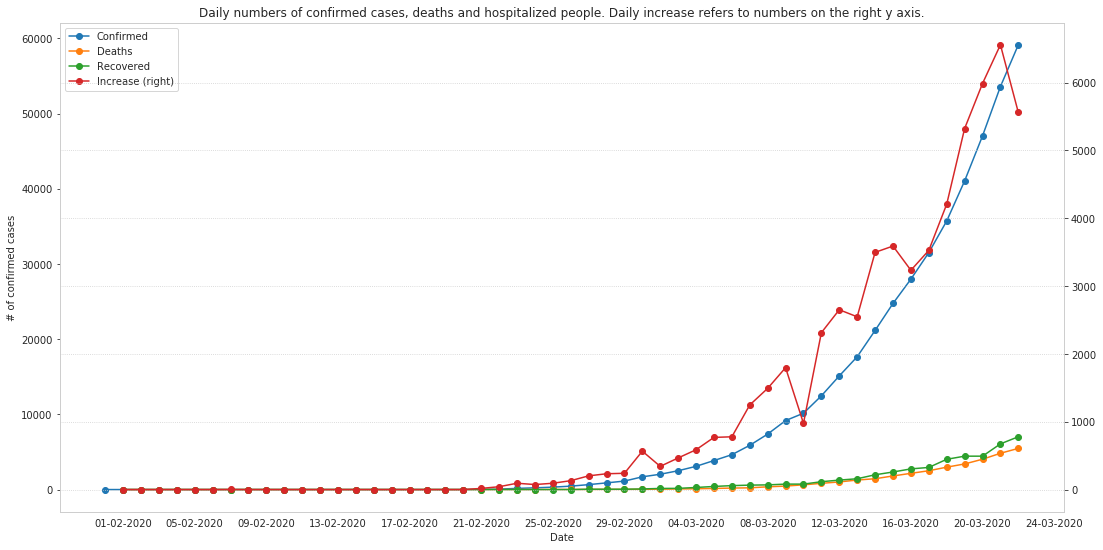

In [47]:
ax = plt.gca()

sns.set_style("whitegrid", {'grid.linestyle': ':'})
# ax.yaxis.set_major_locator(ticker.MultipleLocator(Y_GRID_TICK))
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))

country_df.plot(x='Date', y=["Confirmed", "Deaths", "Recovered"], figsize=(18,9), ax=ax, marker='o')
# country_df.plot(x='Date', y=["Recovered"], figsize=(18,9), ax=ax, marker='o')
country_df.plot(x='Date', y=["Increase"], secondary_y=True, figsize=(18,9), ax=ax, marker='o')



# country_df.plot(x='Date', y=["Recovered"], figsize=(18,9), ax=ax, marker='o')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel("# of confirmed cases");

ax.set_title("Daily numbers of confirmed cases, deaths and hospitalized people. Daily increase refers to numbers on the right y axis.");

plt.savefig("daily_data.png");

$y = e^{ax}$

$\ln{y} = ax$

## ML analysis

In [22]:
from sklearn.linear_model import LinearRegression

from scipy.optimize import curve_fit

In [23]:
# Set range of data to build model

# It might make sense to skip part of the initial points, when the exponential trend was still not evident
START_DATE = datetime(2020, 2, 23).date()
# START_DATE = datetime(2020, 3, 10).date()

### Simple linear fit against log values

In [24]:
# Prepare value vectors

# The acual values
y = country_df[country_df['Date'] > START_DATE]['Confirmed']

# The log values
y_log = np.log(y)

# Independent variable
x = np.arange(len(y))

In [25]:
reg = LinearRegression()
reg.fit(x[:,np.newaxis], y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
reg.coef_

array([0.19932764])

### Curve fit

In [27]:

# The curve we're trying to fit
def my_exp(x, a, b, c):
    return a * np.exp(b * (x + c))

In [28]:
# Fit curve
popt, pcov = curve_fit(my_exp, x, y, p0=(1, 0.14, 42))

/home/matteo/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
popt

array([ 1.4451303 ,  0.1440422 , 47.05387478])

### Create dataframe with estimates

In [30]:
estimate_dates = pd.date_range(start=START_DATE.strftime("%m/%d/%Y"), end='03/20/2020')
estimate_cases = np.exp(reg.predict(np.arange(len(estimate_dates))[:, np.newaxis]))

# Make predictions
estimate_cases_cf = my_exp(np.arange(len(estimate_dates)), *popt)

In [31]:
# df_estimates = pd.DataFrame({"Date": estimate_dates, "Predictions": estimate_cases})
df_estimates = pd.DataFrame({"Date": estimate_dates, "Predictions": estimate_cases, "Predictions_cf": estimate_cases_cf})

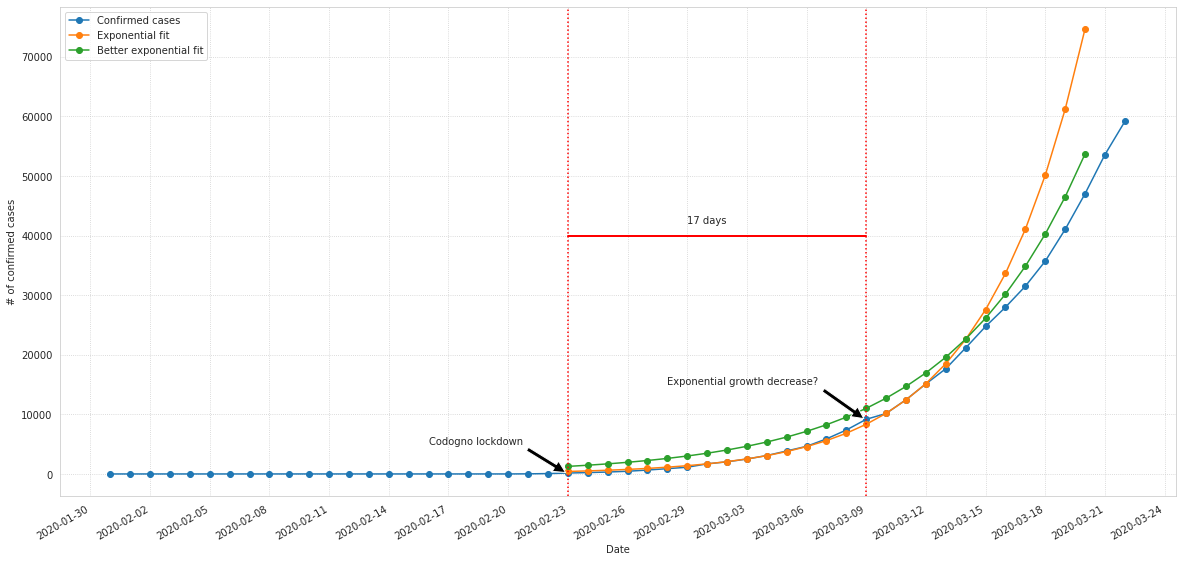

In [32]:
ax = plt.gca()

country_df.plot(x='Date', y=["Confirmed"], figsize=(20,10), ax=ax, marker='o')
df_estimates.plot(x='Date', y=["Predictions"], figsize=(20,10), ax=ax, marker='o')
df_estimates.plot(x='Date', y=["Predictions_cf"], figsize=(20,10), ax=ax, marker='o')


# ax.yaxis.set_major_locator(ticker.MultipleLocator(Y_GRID_TICK))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

ax.set_ylabel("# of confirmed cases");

# Use lines below in case you want to highlight a specific date/value

ax.axvline("2020-02-23", 0, 1, ls=':', color='red')
ax.axvline("2020-03-09", 0, 1, ls=':', color='red')

ax.annotate('Codogno lockdown', xy=("2020-02-23", 10), xytext=("2020-02-16", 5000),
            arrowprops=dict(facecolor='black', shrink=0.05));

ax.annotate('Exponential growth decrease?', xy=("2020-03-09", 9000), xytext=("2020-02-28", 15000),
            arrowprops=dict(facecolor='black', shrink=0.05));

ax.arrow("2020-02-23", 40000, 15, 0, color='red', lw=2, capstyle='round');

ax.annotate("17 days", xy=("2020-02-29", 42000), xytext=("2020-02-29", 42000));

ax.legend([
    "Confirmed cases",
    "Exponential fit",
    "Better exponential fit",
])


plt.savefig("confirmed_cases_prediction.png");

### Estimate people in IC

Assume that 7% of infected people require a bed in IC (rough estimate)

In [33]:
# IC coefficient
IC_coefficient = 0.07

country_df['Confirmed_IC'] = country_df['Confirmed']*IC_coefficient
df_estimates['Predictions_IC'] = df_estimates['Predictions']*IC_coefficient
df_estimates['Predictions_cf_IC'] = df_estimates['Predictions_cf']*IC_coefficient

# df_estimates['IC caspacity (national)'] = ESTIMATED_IC_CAPACITY

### Plot results

In [34]:
# Define an estimate for the capacity of Intensive Care units
ESTIMATED_IC_CAPACITY = 5000

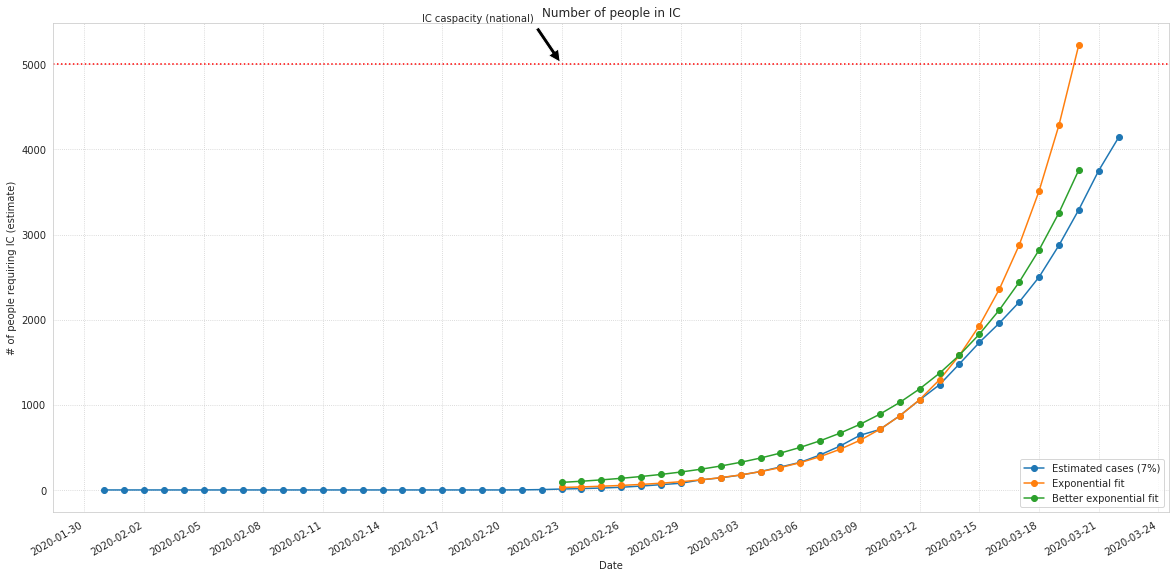

In [35]:
ax = plt.gca()

country_df.plot(x='Date', y=["Confirmed_IC"], figsize=(20,10), ax=ax, marker='o')
df_estimates.plot(x='Date', y=["Predictions_IC"], figsize=(20,10), ax=ax, marker='o')
df_estimates.plot(x='Date', y=["Predictions_cf_IC"], figsize=(20,10), ax=ax, marker='o')

# df_estimates.plot(x='Date', y=['IC caspacity (national)'], ax=ax, color='red', ls='--')
plt.title("Number of people in IC");

sns.set_style("whitegrid", {'grid.linestyle': ':'})

# ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

ax.set_ylabel("# of people requiring IC (estimate)");

ax.axhline(ESTIMATED_IC_CAPACITY, 0, 1, ls=':', color='red')

ax.annotate('IC caspacity (national)', xy=("2020-02-23", 5000), xytext=("2020-02-16", 5500),
            arrowprops=dict(facecolor='black', shrink=0.05));

ax.legend([
    "Estimated cases ({:d}%)".format(int(IC_coefficient*100)),
    "Exponential fit",
    "Better exponential fit",
])

plt.savefig("IC_estimates.png");

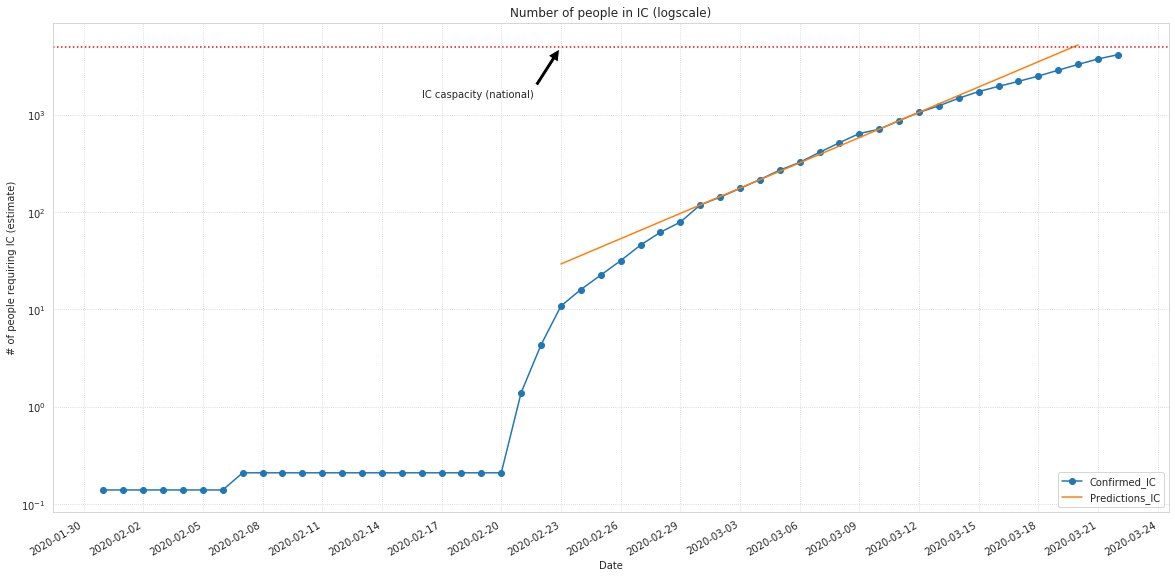

In [36]:
ax = plt.gca()

country_df.plot(x='Date', y=["Confirmed_IC"], figsize=(20,10), ax=ax, marker='o')
df_estimates.plot(x='Date', y=["Predictions_IC"], figsize=(20,10), ax=ax, logy=True)
# df_estimates.plot(x='Date', y=['IC caspacity (national)'], ax=ax, color='red', ls='--', logy=True)
plt.title("Number of people in IC (logscale)");

sns.set_style("whitegrid", {'grid.linestyle': ':'})

ax.axhline(ESTIMATED_IC_CAPACITY, 0, 1, ls=':', color='red')

ax.annotate('IC caspacity (national)', xy=("2020-02-23", 5000), xytext=("2020-02-16", 1500),
            arrowprops=dict(facecolor='black', shrink=0.05));

# ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

ax.set_ylabel("# of people requiring IC (estimate)");

plt.savefig("IC_estimates_logscale.png");

## Countries comparison

Dates for Italy, Norway and Sweden have been manually aligned so that trends overlap.

In addition to that, data from Italy is truncated (data from the last 9 days is omitted) so that it doesn't make lines from other countries difficult to see.

In [37]:
def get_country_df(world_df, country_name):
    
    # Some countries have several Provinces/States, must aggregate
    country_df = world_df[world_df['Country/Region'] == country_name] \
        .groupby(["Country/Region", "Date"]) \
        .sum() \
        .sort_values(by='Date')
    
    # Restore columns
    country_df['Country/Region'] = [i[0] for i in country_df.index]
    country_df['Date'] = [i[1] for i in country_df.index]
    
    return country_df
#     return world_df[world_df['Province/State'] == country_name].sort_values(by='Date')

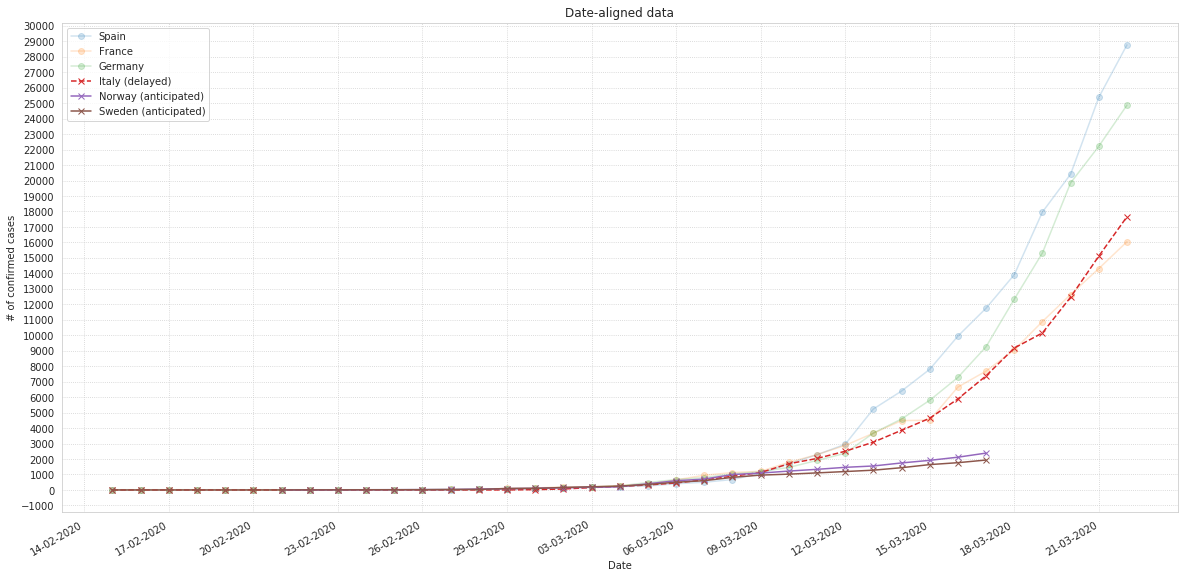

In [38]:
from datetime import timedelta

ax = plt.gca()

sns.set_style("whitegrid", {'grid.linestyle': ':'})
ax.yaxis.set_major_locator(ticker.MultipleLocator(Y_GRID_TICK/5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))


countries_to_plot = [
#     "Italy",
    "Spain",
    "France",
    "Germany",
#     "Norway",
#     "Sweden",
]

for cc in countries_to_plot:
    c_df = get_country_df(world_df, cc)
    c_df = c_df[c_df['Date'] > datetime(2020, 2,14).date()]
    
    c_df.plot(x='Date', y=["Confirmed"], figsize=(20,10), ax=ax, marker='o', alpha=0.2)
    pass

italy_delayed = get_country_df(world_df, "Italy")
italy_delayed = italy_delayed.iloc[:-9,:]

spain_df = get_country_df(world_df, "Spain")
italy_delayed['Date'] = list(spain_df[spain_df['Date'] >= datetime(2020, 2, 9).date()]['Date'])

# Update date dynamically
end_date_skandinavia = (datetime.today() - timedelta(days=6)).date().strftime("%m-%d-%Y")

norway_anticipated = get_country_df(world_df, "Norway")
norway_anticipated['Date'] = pd.date_range(end=end_date_skandinavia, periods=len(norway_anticipated))

sweden_anticipated = get_country_df(world_df, "Sweden")
sweden_anticipated['Date'] = pd.date_range(end=end_date_skandinavia, periods=len(sweden_anticipated))

# Plot adjusted countries
italy_delayed = italy_delayed[italy_delayed['Date'] > datetime(2020, 2,14).date()]
italy_delayed.plot(x='Date', y=["Confirmed"], figsize=(20,10), ax=ax, marker='x', ls="--")

norway_anticipated = norway_anticipated[norway_anticipated['Date'] > "2020-02-14"]
sweden_anticipated = sweden_anticipated[sweden_anticipated['Date'] > "2020-02-14"]

norway_anticipated.plot(x='Date', y=["Confirmed"], figsize=(20,10), ax=ax, marker='x')
sweden_anticipated.plot(x='Date', y=["Confirmed"], figsize=(20,10), ax=ax, marker='x')

ax.legend(countries_to_plot + ['Italy (delayed)', 'Norway (anticipated)', 'Sweden (anticipated)'])
ax.set_ylabel("# of confirmed cases")

plt.title("Date-aligned data");

plt.savefig("europe_aligned_dates.png");

In [39]:
get_country_df(world_df, "Spain").tail()

Confirmed  Deaths  Recovered  Latitude  Longitude  \
Country/Region Date                                                            
Spain          2020-03-18    13910.0   623.0     1081.0   40.4637    -3.7492   
               2020-03-19    17963.0   830.0     1107.0   40.4637    -3.7492   
               2020-03-20    20410.0  1043.0     1588.0   40.4637    -3.7492   
               2020-03-21    25374.0  1375.0     2125.0   40.4637    -3.7492   
               2020-03-22    28768.0  1772.0     2575.0   40.4637    -3.7492   

                          Country/Region        Date  
Country/Region Date                                   
Spain          2020-03-18          Spain  2020-03-18  
               2020-03-19          Spain  2020-03-19  
               2020-03-20          Spain  2020-03-20  
               2020-03-21          Spain  2020-03-21  
               2020-03-22          Spain  2020-03-22

In [40]:
get_country_df(world_df, "Spain")['Confirmed'][-1]

28768.0

In [41]:

daily_increase_df = pd.DataFrame(columns=['Country', 'Date', 'Increase'])

N_data_points = 10

countries = [
    'Spain', 
    'France', 
    'Germany', 
    'Italy', 
    'Norway', 
    'Sweden',
]

for c in countries:

    c_df = get_country_df(world_df, c)

    for i in range(N_data_points):
        inc = c_df['Confirmed'][-N_data_points+i]/c_df['Confirmed'][-N_data_points+i-1]

        daily_increase_df_row = pd.DataFrame.from_dict({'Country': [c], 'Date': [c_df['Date'][-N_data_points+i]], 'Increase': [inc]})

        daily_increase_df = pd.concat((daily_increase_df, daily_increase_df_row), ignore_index=True)
        
daily_increase_df['Increase_p'] = (daily_increase_df['Increase'] - 1) * 100

/home/matteo/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fbf2dde2490> has a label of '_' which cannot be automatically added to the legend.
/home/matteo/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fbf2d574450> has a label of '_' which cannot be automatically added to the legend.
/home/matteo/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fbf2e1e4690> has a label of '_' which cannot be automatically added to the legend.
/home/matteo/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fbf2c049610> has a label of '_' which cannot be automatically added to the legend.
/home/matteo/miniconda3/envs/jupyter/lib/python3.7/site-

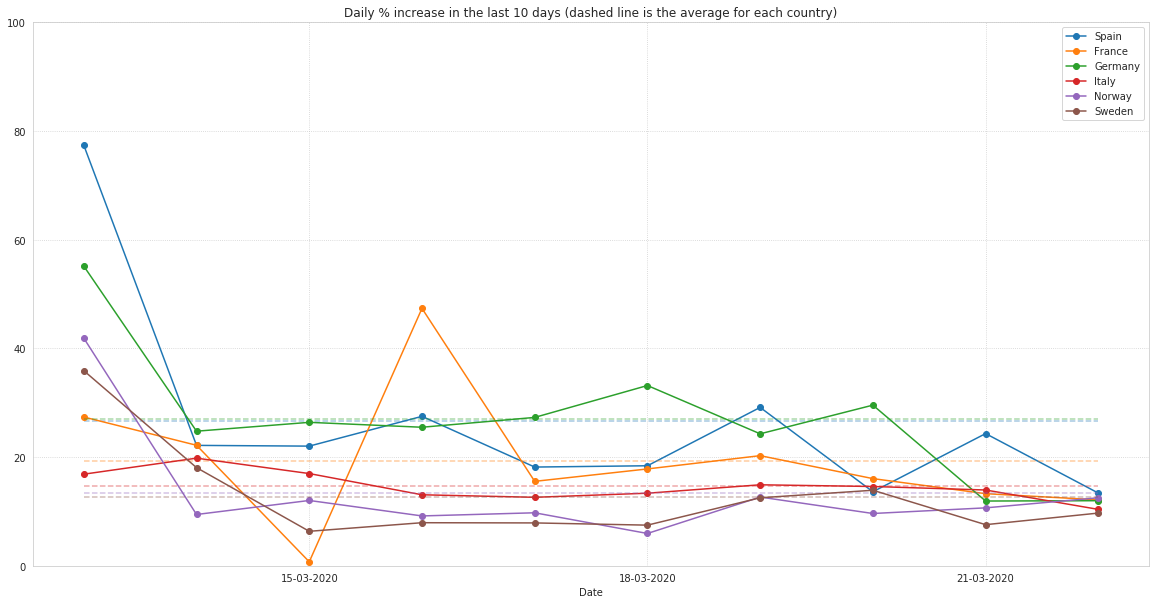

In [42]:
ax = plt.gca()

sns.set_style("whitegrid", {'grid.linestyle': ':'})
# ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))


legend_strings = list()


for c in countries:
    
    daily_increase_df_country = daily_increase_df[daily_increase_df['Country'] == c].copy()
    
    daily_increase_df_country['Average'] = daily_increase_df_country['Increase'].mean()
    daily_increase_df_country['Average_p'] = daily_increase_df_country['Increase_p'].mean()
    
    # Plot daily increase
    daily_increase_df_country.plot(x='Date', y=["Increase_p"], figsize=(20,10), ax=ax, marker='o')
    
#     ax.lines[-1].set_label(c)
    
    # Plot mean (no label)
    
    daily_increase_df_country.plot(
        x='Date', y=["Average_p"], 
        figsize=(20,10), ax=ax, ls="--", alpha=0.4, color=ax.lines[-1].get_color(), legend=False)
    
#     print(dir(ax.lines[-1]))
    
#     ax.lines[-1].set_label("_")
    
#     legend_strings.extend([c, f"{c} (average)"])
    legend_strings.extend([c, "_"])
    
ax.legend(legend_strings)
# ax.legend(countries)

# Limit y range to increase visibility
# ax.set_ylim(1, 2.2);
ax.set_ylim(0, 100);

ax.set_title("Daily % increase in the last 10 days (dashed line is the average for each country)");
plt.savefig("europe_daily_increase_10days.png");
